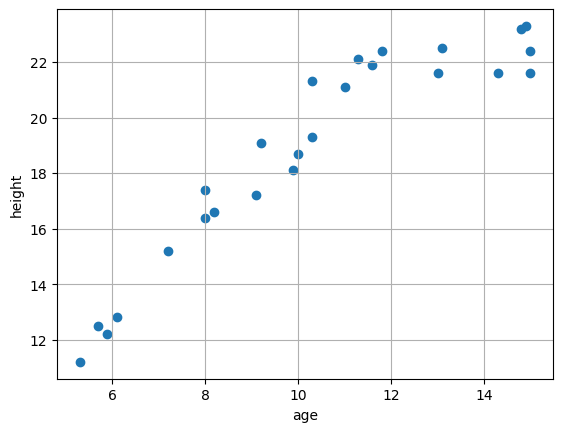

In [19]:
# test_1
# 제공된 데터 파일을 불러들여 x축은 나이(개월), y축은 키(cm)를 나타내는 2차원 평면에
#   각 데이터의 위치를 점으로 표시하시오.

import numpy as np # 배열에 대해 다양한 수학적 연산
import pandas as pd # 데이터 조작 및 분석
import matplotlib.pyplot as plt # 정적, 인터랙티브, 애니메이션 시각화를 파이썬에서 생성

# CSV 파일을 불러와서 pandas DataFrame으로 로드
# 첫 번째 열에는 'age'라는 이름을, 두 번째 열에는 'height'라는 이름을 지정
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])

# DataFrame에서 'age' 및 'height'열을 추출하고 이를 numpy 배열로 변환하여 수치 계산을 수행
age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

plt.scatter(age, height)
plt.xlabel('age'); plt.ylabel('height')
plt.grid()
plt.show()

In [20]:
# test_2
# 제공된 데이터를 모두 이용하여 최적 선형회귀를 위한 해석해를 구하라.


import pandas as pd # 데이터 조작 및 분석
import numpy as np # 배열에 대해 다양한 수학적 연산
import matplotlib.pyplot as plt # 정적, 인터랙티브, 애니메이션 시각화를 파이썬에서 생성

# CSV 파일을 불러와서 pandas DataFrame으로 로드
# 첫 번째 열에는 'age'라는 이름을, 두 번째 열에는 'height'라는 이름을 지정
raw_data = pd.read_csv('linear_regression_data01.csv', names = ['age', 'height'])

X = raw_data['age'].to_numpy() # DataFrame에서 'age'열을 추출하고 이를 numpy 배열로 변환. 이는 회귀분석의 독립변수로 사용.
X = np.c_[X, np.ones(len(X))] # numpy의 c_ 객체를 사용하여 1의 값을 갖는 열을 X 배열에 추가. 이는 선형회귀 모델에서 절편을 포함하기 위함.
y = raw_data['height'].to_numpy() # DataFrame에서 'height'열을 추출하고 이를 numpy 배열로 변환. 이는 회귀분석의 종속변수(타겟)로 사용.
y = y.reshape((len(y), 1)) # y 배열을 reshape 메소드를 사용하여 (len(y),1)의 형태로 재구성. 이는 y가 각 관측치에 대한 열 벡터 형태가 되어야 하기 때문.

# calculated analytic soultions
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y # X의 전치 행렬과 X를 행렬 곱한 결과의 유사 역핼렬을 계산. 이 결과 X의 전치 행렬과 y를 행렬 곱한 결과를 곱하여 해석적 가중치를 계산
print(f'W0 = [{analytic_W[0][0]}]') # 절편
print(f'W1 = [{analytic_W[1][0]}]') 
print(f'가중치 : W = [{analytic_W}]')


W0 = [1.124003093846681]
W1 = [7.223327947748395]
가중치 : W = [[[1.12400309]
 [7.22332795]]]


해석해 : [[1.12400309]
 [7.22332795]]


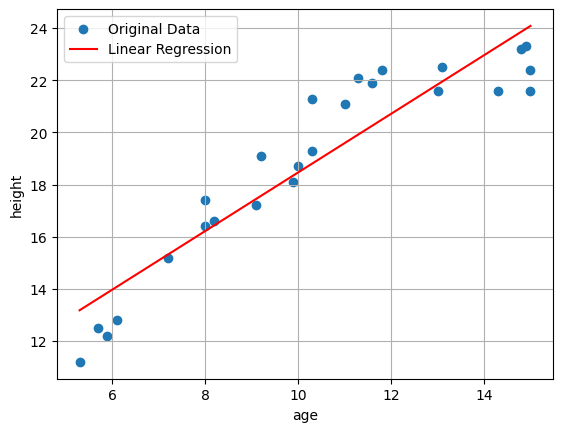

In [21]:
# test_3
# 해석해로 구한 선형모델과 데이터를 한 그래프에 표시하라.
# 필수요소 : x축, y축 이름, grid, legend
# 결과물 : 그래프

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv("linear_regression_data01.csv", names = ['age','height'])

age = raw_data['age'].to_numpy()
X = age
X = np.c_[X, np.ones(len(X))]
height = raw_data['height'].to_numpy()
y = height
y = y.reshape((len(y),1))

analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y
print(f'해석해 : {analytic_W}')

#plot
age_ = np.linspace(np.min(age), np.max(age), len(age))
analytic_y = analytic_W[0] * age_ + analytic_W[1]

plt.scatter(age, height, label='Original Data')
plt.plot(age_, analytic_y, 'r', label='Linear Regression')
plt.xlabel('age'); plt.ylabel('height'); plt.legend(); plt.grid()
plt.show()

In [22]:
# test_4
# 해석해로 구한 선형모델의 평균제곱오차를 구하라.
# 결과물 : 코드, 평균제곱오차

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv("linear_regression_data01.csv", names=['age','height'])
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]
y = raw_data['height'].to_numpy()
y = y.reshape((len(y),1))

# 해석해
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# 평균제곱오차
def calculated_MSE(W,X,y):
    mse = np.zeros(len(X))
    
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2
    mse = np.sum(mse) / len(X)
    
    return mse

mse = calculated_MSE(analytic_W, X, y)
print(f'MSE : {mse}')

MSE : 1.8631967487108974


/var/folders/hc/79htlj_d3_v1qc1c0kn62jf80000gn/T/ipykernel_70746/702312334.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2


In [40]:
# test_5_6
# 실험적으로 최적 매개변수를 찾기 위한 경사하강법 알고리즘을 프로그램으로 작성하라. 단, 경사하강법 외부 사용 금지.
# 결과물 : 코드

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리 ####################################################################
raw_data = pd.read_csv("linear_regression_data01.csv", names=['age','height'])
X = raw_data['age'].to_numpy()
X = np.c_[X, np.ones(len(X))]
y = raw_data['height'].to_numpy()
y = y.reshape(len(y),1)
##################################################################################

# 평균제곱오차(Mean Square Error; MSE) ; 비용함수(Cost function)
def calculated_MSE(W,X,y): # W:가중치, X:특성행렬, y:타겟벡터
    mse = np.zeros(len(X)) # 각 제곱오차 저장할 배열 데이터 포인트 0으로 초기화, 배열 길이는 X와 동일.
    
    for idx in range(len(X)): # X의 각 데이터 포인트에 대해 반복
        mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2 # 예측값(np.dot(W.T,X[idx])) - 실제값(y[idx])의 차이의 제곱
    mse = np.sum(mse) / len(X) # mse = 모델 예측값 - 실제값의 오차의 제곱들의 합에 대한 전체 평균
    
    return mse
##################################################################################

# 수치미분법(경사하강법에 쓰이는 기울기값)
def numerical_gradient(f,W,X,y):
    h = 1e-4
    grad = np.zeros_like(W)
    for idx in range(W.size):
        tmp_val = W[idx]
        # f(X+h)
        W[idx] = tmp_val+h
        fxh1 = f(W,X,y)
        
        # f(X-h)
        W[idx] = tmp_val-h
        fxh2 = f(W,X,y)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        W[idx] = tmp_val
    return grad
##################################################################################

# 
num_epoch=300_000
eta = 1e-4
print(f'학습률 : \n{eta}')
print(f'반복횟수 : \n{num_epoch}')
errors = []
GD_W0_history = []
GD_W1_history = []

# GD _ 초기값 설정 및 출력
GD_W = np.zeros((2, 1))
GD_W[0] = np.random.uniform(low=0, high=10.0)
GD_W[1] = np.random.uniform(low=0, high=10.0)
# GD_W[0] = np.random.uniform(low=1, high=2.0)
# GD_W[1] = np.random.uniform(low=7, high=8.0)
print(f'랜덤하게 초기화한 가중치 값 : \n{GD_W}')

# 경사하강법 실행
for epoch in range(num_epoch):
    mse = calculated_MSE(GD_W, X, y)
    gradient = numerical_gradient(calculated_MSE,GD_W,X,y)
    GD_W = GD_W - eta*gradient
    
    if mse < 1.7: # mse(오차율)이 1.7 이하에 도달하면 경사하강법 종료
        print('GD를 종료합니다.')
        break

    errors.append(mse)
    GD_W0_history.append(GD_W[0])
    GD_W1_history.append(GD_W[1]) # mse(오차율) errors 리스트에 추가하여 오차 기록.

    if epoch%100 == 0:
        print(f'epoch:{epoch} ========> W:{GD_W.flatten()}, gradient:{gradient.flatten()}, mse:{mse}')

print(f'최종 평균제곱오차 mse:{mse}')    
print(f'최적매개변수 GD_W: {GD_W}')

학습률 : 
0.0001
반복횟수 : 
300000
랜덤하게 초기화한 가중치 값 : 
[[1.61556814]
 [7.72556629]]
epoch:0 ========> W:[1.6093137 7.7250068], gradient:[62.54438182  5.59490224], mse:35.41491133686271
epoch:100 ========> W:[1.24470222 7.69224118], gradient:[19.16729246  1.73943746], mse:5.028620009368372
epoch:200 ========> W:[1.13297285 7.68195248], gradient:[5.8724737  0.55774088], mse:2.175066099899097
epoch:300 ========> W:[1.09875033 7.67855302], gradient:[1.79769237 0.19553841], mse:1.9072644913503298
epoch:400 ========> W:[1.08828318 7.67726526], gradient:[0.5487978  0.08450604], mse:1.882170313082889
epoch:500 ========> W:[1.0850969  7.67662492], gradient:[0.16602076 0.05045582], mse:1.8798161299682172
epoch:600 ========> W:[1.08414214 7.67618321], gradient:[0.04870359 0.04000019], mse:1.8795798674500461
epoch:700 ========> W:[1.08387131 7.67580257], gradient:[0.0127483  0.03677619], mse:1.8795369933529344
epoch:800 ========> W:[1.08381008 7.67544084], gradient:[0.00172994 0.03576864], mse:1.87951060

/var/folders/hc/79htlj_d3_v1qc1c0kn62jf80000gn/T/ipykernel_70746/3434623372.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2 # 예측값(np.dot(W.T,X[idx])) - 실제값(y[idx])의 차이의 제곱


epoch:1000 ========> W:[1.08383575 7.67473139], gradient:[-0.00267819  0.03532048], mse:1.8794599206021527
epoch:1100 ========> W:[1.08386442 7.67437849], gradient:[-0.00299302  0.03526435], mse:1.879434549940196
epoch:1200 ========> W:[1.08389493 7.67402604], gradient:[-0.00308779  0.03522781], mse:1.8794091988352704
epoch:1300 ========> W:[1.08392597 7.67367392], gradient:[-0.00311512  0.03519728], mse:1.8793838810422978
epoch:1400 ========> W:[1.08395716 7.67332209], gradient:[-0.00312178  0.03516861], mse:1.8793586010172691
epoch:1500 ========> W:[1.08398839 7.67297055], gradient:[-0.00312211  0.03514052], mse:1.8793333601090658
epoch:1600 ========> W:[1.0840196  7.67261929], gradient:[-0.00312049  0.03511263], mse:1.8793081586901668
epoch:1700 ========> W:[1.08405079 7.6722683 ], gradient:[-0.00311829  0.03508481], mse:1.879282996831603
epoch:1800 ========> W:[1.08408197 7.67191759], gradient:[-0.0031159   0.03505703], mse:1.8792578745118542
epoch:1900 ========> W:[1.08411311 7.67

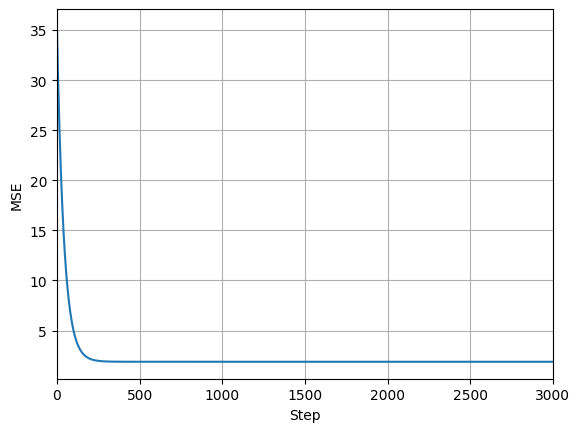

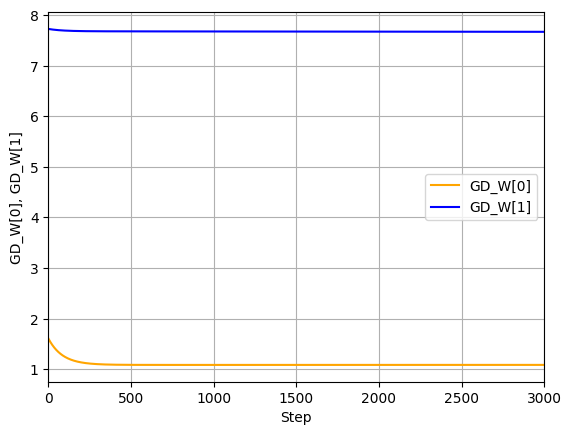

In [49]:
# test_7
# 경사하강법의 반복 회수에 따른 평균제곱오차, 매개변수의 값을 그래프로 표시하라.
# 결과물 : 그래프

plt.figure(1)
plt.plot(errors)
plt.xlabel('Step')
plt.ylabel('MSE')
plt.xlim(0,3000)

plt.grid(True)
plt.show()

steps = range(num_epoch)
plt.figure(2)
plt.plot(steps, GD_W0_history, '-', color='orange', label='GD_W[0]')
plt.plot(steps, GD_W1_history, '-', color='blue', label='GD_W[1]')
plt.xlabel('Step')
plt.ylabel('GD_W[0], GD_W[1]')
plt.xlim(0,3000)
plt.legend()
plt.grid(True)
plt.show()

랜덤하게 초기화한 가중치 값 : 
[[1.76762161]
 [7.78127026]]
epoch:0 ========> W:[1.75953593 7.78054767], gradient:[80.85674806  7.22588013], mse:57.93193968932664
epoch:100 ========> W:[1.28816725 7.73825988], gradient:[24.77971998  2.24161852], mse:7.146327801446663
epoch:200 ========> W:[1.14371947 7.72502974], gradient:[7.59244552 0.7139506 ], mse:2.376753531402756
epoch:300 ========> W:[1.09947099 7.72070581], gradient:[2.32464978 0.24570814], mse:1.9290412635514511
epoch:400 ========> W:[1.08593298 7.7191118 ], gradient:[0.71010353 0.10217333], mse:1.8870671977290119
epoch:500 ========> W:[1.08180753 7.7183547 ], gradient:[0.21525658 0.0581595 ], mse:1.8831305570873533
epoch:600 ========> W:[1.08056695 7.71785432], gradient:[0.06359081 0.04464827], mse:1.882743511621414
epoch:700 ========> W:[1.08021055 7.71743283], gradient:[0.01710804 0.04048593], mse:1.8826827108720743
epoch:800 ========> W:[1.08012513 7.71703574], gradient:[0.00286323 0.03918898], mse:1.8826503806822898
epoch:900 ========

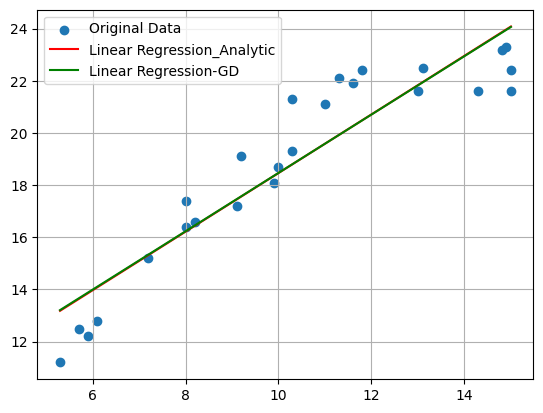

In [54]:
# test_8
# 훈련 데이터, 해석해를 이용해 구한 회귀모델, 경사하강법을 이용해 구한 회귀모델을 하나의 그래프에 표시하라.
# 필수 요소: x축, y축 이름, grid, legend
# 결과물 : 코드, 그래프

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("linear_regression_data01.csv", names = ['age','height'])
age = data['age'].to_numpy()
X = age
X = np.c_[X, np.ones(len(X))]
height = data['height'].to_numpy()
y = height
y = y.reshape((len(y),1))

# 해석해 ########################################################################
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y
age_ = np.linspace(np.min(age), np.max(age), len(age))
analytic_y = analytic_W[0] * age_ + analytic_W[1]
################################################################################

# MSE ##########################################################################
def calculated_MSE(W,X,y):
    predictions = X.dot(W)
    errors = predictions - y
    mse = (errors ** 2).mean()
    return mse
################################################################################

# Gradiant #####################################################################
def numerical_gradient(f, W, X, y):
    h = 1e-4
    grad = np.zeros_like(W)
    
    for idx in range(W.size):
        tmp_val = W[idx]
        W[idx] = tmp_val + h
        fxh1 = f(W, X, y)
        W[idx] = tmp_val - h
        fxh2 = f(W, X, y)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        W[idx] = tmp_val
        
    return grad
################################################################################

# 경사하강법 실행 #################################################################
num_epoch = 300_000
eta = 1e-4
errors = []
GD_W0_history = []
GD_W1_history = []

# GD _ 초기값 설정 및 출력
GD_W = np.zeros((2, 1))
# GD_W[0] = np.random.uniform(low=0, high=10.0)
# GD_W[1] = np.random.uniform(low=0, high=10.0)
GD_W[0] = np.random.uniform(low=1, high=2.0)
GD_W[1] = np.random.uniform(low=7, high=8.0)
print(f'랜덤하게 초기화한 가중치 값 : \n{GD_W}')

for epoch in range(num_epoch):
    mse = calculated_MSE(GD_W, X, y)
    gradient = numerical_gradient(calculated_MSE,GD_W,X,y)
    GD_W = GD_W - eta*gradient
    
    if mse < 1.7: # mse(오차율)이 1.7 이하에 도달하면 경사하강법 종료
        print('GD를 종료합니다.')
        break

    errors.append(mse)
    GD_W0_history.append(GD_W[0])
    GD_W1_history.append(GD_W[1]) # mse(오차율) errors 리스트에 추가하여 오차 기록.

    if epoch%100 == 0:
        print(f'epoch:{epoch} ========> W:{GD_W.flatten()}, gradient:{gradient.flatten()}, mse:{mse}')
GD_y = GD_W[0] * age_ + GD_W[1]
################################################################################


# 그래프 표현 ####################################################################
plt.scatter(age, height, label='Original Data')
plt.plot(age_, analytic_y, 'r', label='Linear Regression_Analytic')
plt.plot(age_,GD_y, 'g', label='Linear Regression-GD')
plt.grid(True)
plt.legend()
plt.show()
################################################################################

